In [1]:
import numpy as np # для работы с массивами
import pandas as pd # для работы DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline

Признаки: 

1. GRE Scores ( out of 340 ) — баллы по GRE тестированию
2. TOEFL Scores ( out of 120 ) — баллы по экзамену TOEFL
3. University Rating ( out of 5 ) — рейтинг университета 
4. Statement of Purpose Strength ( out of 5 ) — весомость мотивационного письма
5. Letter of Recommendation Strength ( out of 5 ) — весомость рекомендационных писем
6. Undergraduate GPA ( out of 10 ) — средний балл в бакалавриате
7. Research Experience ( either 0 or 1 ) — наличие опыта исследовательской работы ( нет / есть)

In [2]:
data = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [3]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [4]:
np.shape(data)[0]

500

In [5]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
adm_df = data.iloc[:,1:]

In [7]:
adm_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [8]:
cor_adm = adm_df.corr(method='pearson')
cor_adm

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


# представим корреляционную матрицу в виде "тепловой карты" с помощью функции heatmap из библиотеки seaborn
plt.figure(figsize=(16,6)) # размер графика
sns.heatmap(data=C, annot=True)

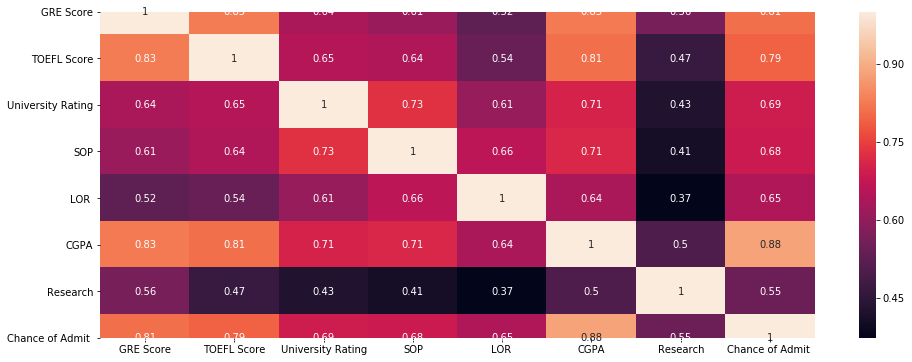

In [9]:
plt.figure(figsize=(16,6))
sns.heatmap(data=cor_adm, annot=True)

In [10]:
adm_df_res_1 = adm_df[adm_df['Research']==1]
adm_df_res_0 = adm_df[adm_df['Research']==0]

In [11]:
cor_adm_res_1 = adm_df_res_1.corr(method='pearson')
cor_adm_res_0 = adm_df_res_0.corr(method='pearson')

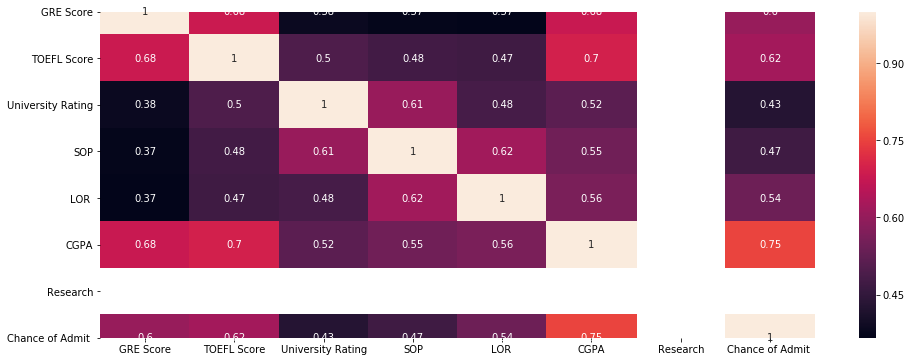

In [12]:
plt.figure(figsize=(16,6))
sns.heatmap(data=cor_adm_res_0, annot=True)

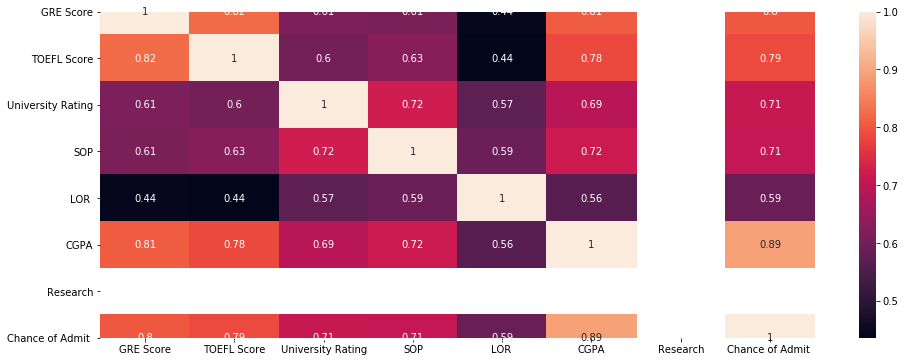

In [13]:
plt.figure(figsize=(16,6))
sns.heatmap(data=cor_adm_res_1, annot=True)

In [14]:
TOEFL=adm_df_res_0['TOEFL Score']
CGPA=adm_df_res_0['CGPA']
A=np.column_stack((np.ones(220),TOEFL,CGPA ))
y=adm_df_res_0[['Chance of Admit ']]
w_hat = np.linalg.inv(A.T@A)@A.T@y

In [15]:
w_hat

,Chance of Admit
0,-1.044864
1,0.004427
2,0.148077


In [16]:
# прогноз TOEFL Score=107, CGPA=9.1
# добавились данные по новому городку:
TOEF_new=107
CGPA_new=9.1
# делаем прогноз типичной соимости дома
PRICE_new=w_hat.iloc[0]+w_hat.iloc[1]*TOEF_new+w_hat.iloc[2]*CGPA_new
PRICE_new

Chance of Admit     0.776359
dtype: float64

In [17]:
adm_df_res_0

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
4,314,103,2,2.0,3.0,8.21,0,0.65
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45
15,314,105,3,3.5,2.5,8.30,0,0.54
...,...,...,...,...,...,...,...,...
487,327,115,4,3.5,4.0,9.14,0,0.79
489,302,110,3,4.0,4.5,8.50,0,0.65
491,297,99,4,3.0,3.5,7.81,0,0.54
498,312,103,4,4.0,5.0,8.43,0,0.73


In [20]:
Data = adm_df_res_0[['TOEFL Score','CGPA']]
Data

,TOEFL Score,CGPA
4,103,8.21
7,101,7.90
8,102,8.00
9,108,8.60
15,105,8.30
...,...,...
487,115,9.14
489,110,8.50
491,99,7.81
498,103,8.43


In [21]:
y = adm_df_res_0[['Chance of Admit ']]

In [22]:
mean_toefl = Data['TOEFL Score'].mean()
mean_cgpa  = Data['CGPA'].mean()
mean_y = y.mean()
print('mean value of TOEFL Score:', mean_toefl)
print('mean value of CGPA:', mean_cgpa)
print('mean value of PRICE:', mean_y)

mean value of TOEFL Score: 103.99090909090908
mean value of CGPA: 8.234727272727275
mean value of PRICE: Chance of Admit     0.634909
dtype: float64


In [23]:
# Центрирование
toefl_c = Data['TOEFL Score'] - mean_toefl
cgpa_c = Data['CGPA'] - mean_cgpa
y_c = y - mean_y
print('TOEFL Score до центрирования:\n', Data['TOEFL Score'].head(4))
print('TOEFL Score после центрирования:\n', toefl_c.head(4))

TOEFL Score до центрирования:
 4    103
7    101
8    102
9    108
Name: TOEFL Score, dtype: int64
TOEFL Score после центрирования:
 4   -0.990909
7   -2.990909
8   -1.990909
9    4.009091
Name: TOEFL Score, dtype: float64


In [24]:
print('среднее арифметическое вектора TOEFL Score после центрирования:',toefl_c.mean())

среднее арифметическое вектора TOEFL Score после центрирования: 5.2321783269607375e-15


In [26]:
toefl_c_norm = np.linalg.norm(toefl_c)
cgpa_c_norm = np.linalg.norm(cgpa_c)
y_c_norm = np.linalg.norm(y_c)
print('norm of TOEFL Score:\n', toefl_c_norm)

norm of TOEFL Score:
 71.24592492333734


In [27]:
# Нормирование: делим каждый центрированный вектор на его длину
toefl_st = toefl_c / toefl_c_norm
cgpa_st = cgpa_c / cgpa_c_norm
y_st = y_c / y_c_norm
print('TOEFL Score до центрирования:\n', Data['TOEFL Score'].head(4))
print('TOEFL Score после центрирования:\n', toefl_c.head(4))
print('TOEFL Score после нормирования:\n', toefl_st.head(4))

TOEFL Score до центрирования:
 4    103
7    101
8    102
9    108
Name: TOEFL Score, dtype: int64
TOEFL Score после центрирования:
 4   -0.990909
7   -2.990909
8   -1.990909
9    4.009091
Name: TOEFL Score, dtype: float64
TOEFL Score после нормирования:
 4   -0.013908
7   -0.041980
8   -0.027944
9    0.056271
Name: TOEFL Score, dtype: float64


In [28]:
# Матрица центрированных признаков - БЕЗ константы!
A_st=np.column_stack(( toefl_st, cgpa_st,))
A_st

array([[-1.39082915e-02, -3.56567808e-03],
       [-4.19800725e-02, -4.82677452e-02],
       [-2.79441820e-02, -3.38477235e-02],
       [ 5.62711610e-02,  5.26724063e-02],
       [ 1.41634895e-02,  9.41234140e-03],
       [ 4.22352705e-02,  6.70924280e-02],
       [ 8.43429419e-02,  8.15124496e-02],
       [-2.79441820e-02,  3.82523847e-02],
       [ 1.40486504e-01,  2.38323630e-02],
       [ 7.03070514e-02,  8.15124496e-02],
       [-1.54267196e-01, -1.49207897e-01],
       [-7.00518534e-02, -1.34787875e-01],
       [ 2.81993800e-02,  2.38323630e-02],
       [ 1.41634895e-02, -6.26877668e-02],
       [ 1.41634895e-02, -1.05947832e-01],
       [ 5.62711610e-02, -7.71077885e-02],
       [ 1.82594175e-01,  1.24772515e-01],
       [ 2.10665956e-01,  2.11292644e-01],
       [ 8.43429419e-02, -3.38477235e-02],
       [-1.39082915e-02, -7.71077885e-02],
       [-2.79441820e-02, -1.20367853e-01],
       [-7.00518534e-02, -9.15278101e-02],
       [ 1.27599004e-04,  9.41234140e-03],
       [-5.

In [29]:
# OLS оценка коэффициентов центрированной регрессии
w_hat_st=np.linalg.inv(A_st.T@A_st)@A_st.T@y_st.values
w_hat_st

array([[0.19044768],
       [0.62001517]])